In [98]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
file_path = 'questionnaire.csv'
data = pd.read_csv(file_path)

general_statistics = data.describe(include='all')
general_statistics

,date d'inscription (ou de requête),Quel âge avez-vous ?,Vous êtes...,Quelle est votre langue maternelle ?,Quelle langue enseignez-vous ?,Apprenez vous une nouvelle langue ?,Laquelle ?,Avez-vous besoin d'apprendre un nouvel alphabet ?,Vous apprenez...,Avez-vous besoin d'enseigner un nouvel alphabet ?,...,Dans quel(s) but(s) utilisez-vous ces outils ?,Quelles sont les ressources que vous utilisez ?,Comment utilisez-vous les technologies dans votre enseignement et quels sont leurs avantages et inconvénients ?,Quelles fonctionnalités souhaiteriez-vous voir améliorées sur ces outils ?,Dans quelle mesure faites vous confiance aux outils d'intelligence artificielles ?,Quelles sont les ressources que vous utilisez durant vos cours ?,IP de soumission,Date de la dernière mise à jour,Dans quel(s) but(s) utilisez-vous ces outils ?.1,présentation ID
count,40,40.000000,40,40,3,37,36,35,37,5,...,34,37,2,22,36.000000,4,40,11,3,4.000000e+01
unique,17,NaN,2,15,3,1,27,2,4,2,...,18,22,2,22,NaN,3,39,2,3,NaN
top,"août 1, 2024",NaN,"Etudiant, apprenant d'une nouvelle langue",Français,English,Oui,English,Non,Seul (autodidacte),Non,...,Pour progresser à mon propre rythme et sans pr...,Applications mobiles,Use google translate in class (no books needed...,Nothing really,NaN,Livres\nSites internet traditionnels\nOutils d...,79.141.0.52,"août 25, 2024",Pour la personnalisation de l'enseignement\nFo...,NaN
freq,9,NaN,37,11,1,37,3,24,23,4,...,4,4,1,1,NaN,2,2,8,1,NaN
mean,NaN,26.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.444444,NaN,NaN,NaN,NaN,5.958893e+18
std,NaN,10.384777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.534837,NaN,NaN,NaN,NaN,3.204455e+16
min,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,5.902796e+18
25%,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,5.915718e+18
50%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,5.975002e+18
75%,NaN,28.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,5.983005e+18


In [100]:
count_apprenant = data['Vous êtes...'].str.contains('apprenant', case=False).sum()
count_enseignant = data['Vous êtes...'].str.contains('professeur', case=False).sum()
total = len(data)

percentage_apprenant = (count_apprenant / total) * 100
percentage_enseignant = (count_enseignant / total) * 100

print(f"Nombre d'apprenants: {count_apprenant}, soit {percentage_apprenant:.2f}%")
print(f"Nombre d'enseignants: {count_enseignant}, soit {percentage_enseignant:.2f}%")


Nombre d'apprenants: 37, soit 92.50%
Nombre d'enseignants: 3, soit 7.50%


In [101]:
apprenants = data[data['Vous êtes...'].str.contains('apprenant', case=False, na=False)]

age_moyen_apprenants = apprenants['Quel âge avez-vous ?'].mean()

print(f"L'âge moyen des apprenants est de {age_moyen_apprenants:.2f} ans.")

L'âge moyen des apprenants est de 25.86 ans.


In [102]:
apprenants = data[data['Vous êtes...'].str.contains('apprenant', case=False, na=False)]

def normalize_language(lang):
    if isinstance(lang, str):
        lang = lang.lower().strip()
        if lang in  ['japonais', 'japanese', '日本語']:
            return 'Japonais'
        elif lang in ['français', 'french', 'francais', 'française']:
            return 'Français'
        elif lang in ['anglais', 'english', 'english (usa)', 'american english']:
            return 'Anglais'
        elif lang in ['russian']:
            return 'Russe'
        elif lang in ['arabic']:
            return 'Arabe'
        elif lang in ['german']:
            return 'Allemand'
    return lang

apprenants['Langue Maternelle Normalisée'] = apprenants['Quelle est votre langue maternelle ?'].apply(normalize_language)

langue_counts = apprenants['Langue Maternelle Normalisée'].value_counts()

langue_percentages = (langue_counts / langue_counts.sum()) * 100



/var/folders/hw/wy1jtnxj1gbgkbvb6zw_8st00000gn/T/ipykernel_89259/3081643185.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apprenants['Langue Maternelle Normalisée'] = apprenants['Quelle est votre langue maternelle ?'].apply(normalize_language)


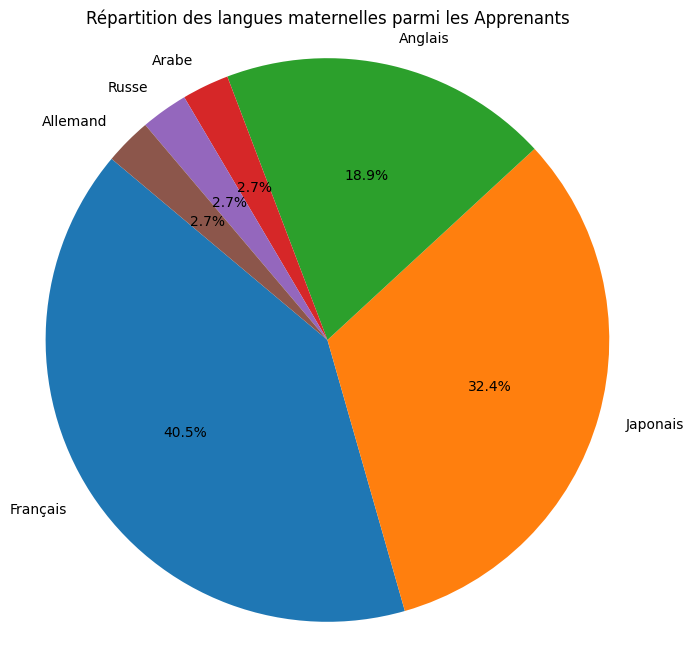

In [103]:
plt.figure(figsize=(8, 8))
plt.pie(langue_percentages, labels=langue_percentages.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Répartition des langues maternelles parmi les Apprenants")
plt.show()


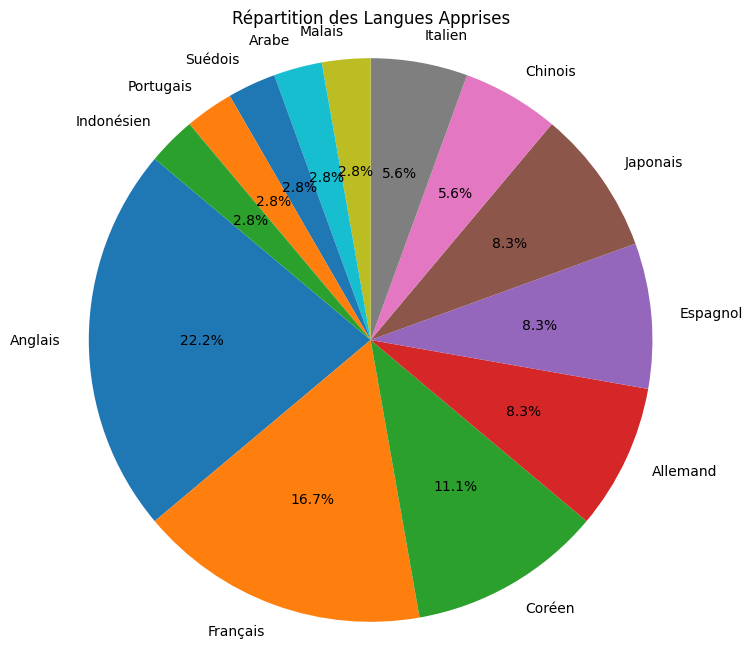

In [104]:
def normalize_learned_language(lang):
    if isinstance(lang, str):
        lang = lang.lower().strip()
        if lang in ['japonais']:
            return 'Japonais'
        elif lang in ['français', 'french', 'フランス語', 'le français']:
            return 'Français'
        elif lang in ['english', 'anglais', 'anglais principale, chinois secondaire', '英語　韓国語', '英語']:
            return 'Anglais'
        elif lang in ['spanish']:
            return 'Espagnol'
        elif lang in ['coréen', '韓国語']:
            return 'Coréen'
        elif lang in ['中国語']:
            return 'Chinois'
        elif lang in ['german', 'allemand']:
            return 'Allemand'
        elif lang in ['suédois']:
            return 'Suédois'
        elif lang in ['italien', 'italien et anglais']:
            return 'Italien'
        elif lang in ['darija']:
            return 'Arabe'
        elif lang in ['malais']:
            return 'Malais'
        elif lang in ['インドネシア語']:
            return 'Indonésien'
        elif lang in ['portuguese']:
            return 'Portugais'
    return lang

data['Langue Apprise Normalisée'] = data['Laquelle ?'].apply(normalize_learned_language)

langue_apprise_counts = data['Langue Apprise Normalisée'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(langue_apprise_counts, labels=langue_apprise_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Répartition des Langues Apprises")
plt.show()

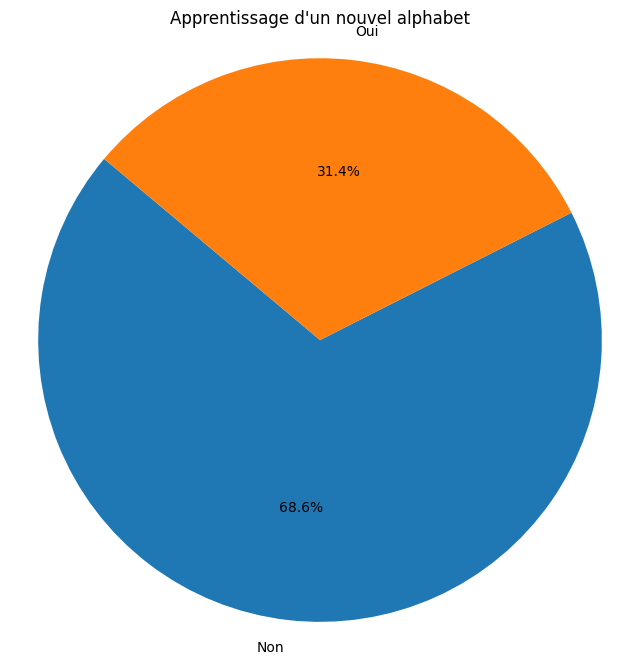

In [105]:
new_alphabet = data["Avez-vous besoin d'apprendre un nouvel alphabet ?"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(new_alphabet, labels=new_alphabet.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title("Apprentissage d'un nouvel alphabet")
plt.show()

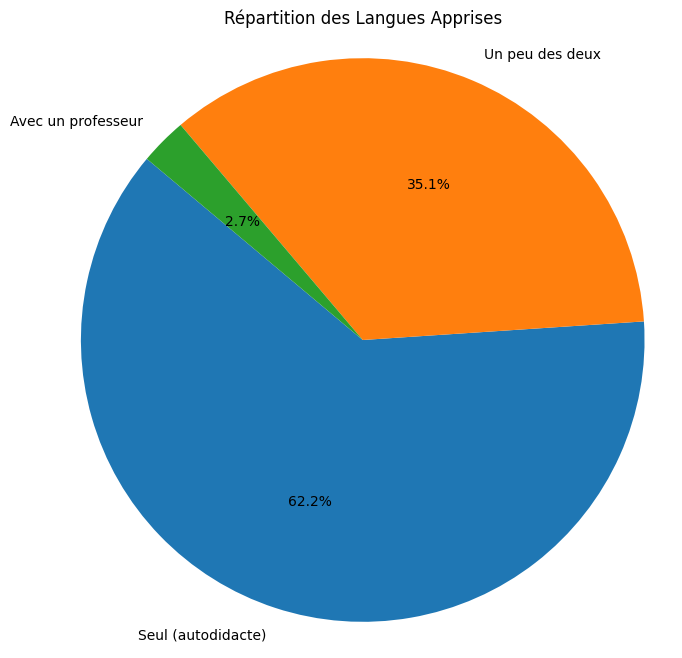

In [106]:
def normalize_learnway(lang):
    if isinstance(lang, str):
        lang = lang
        if lang in ['Un peu des 2']:
            return 'Un peu des deux'
    return lang

data['Vous apprenez Traité'] = data['Vous apprenez...'].apply(normalize_learnway)


learn_way = data["Vous apprenez Traité"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(learn_way, labels=learn_way.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title("Répartition des Langues Apprises")
plt.show()

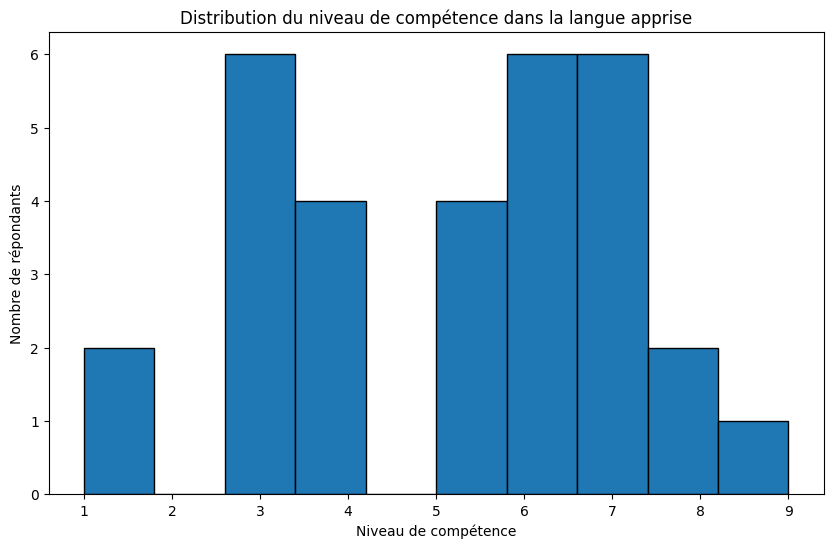

In [107]:
time = data["Comment évaluez-vous votre niveau de compétence dans la langue apprise ?"].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(data["Comment évaluez-vous votre niveau de compétence dans la langue apprise ?"], bins=10, edgecolor='black')
plt.xlabel('Niveau de compétence')
plt.ylabel('Nombre de répondants')
plt.title('Distribution du niveau de compétence dans la langue apprise')
plt.show()

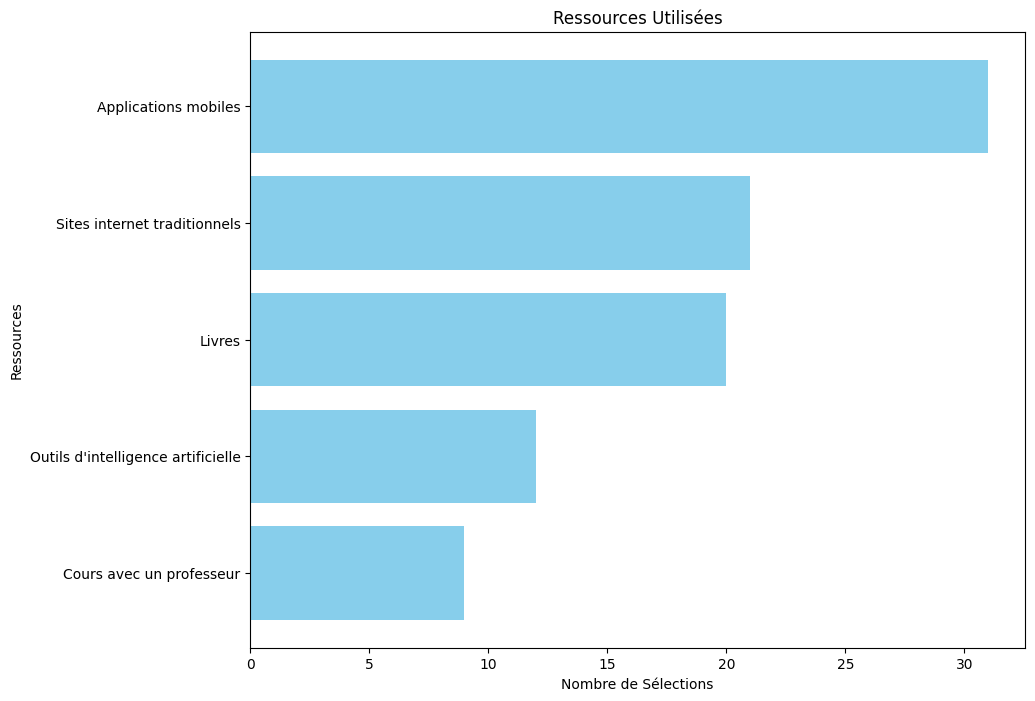

In [108]:
resources = data['Quelles sont les ressources que vous utilisez ?'].dropna().str.split('\n').sum()

resource_counts = Counter(resources)

resource_counts_df = pd.DataFrame(resource_counts.items(), columns=['Ressource', 'Count']).sort_values(by='Count', ascending=False)

resource_counts_filtered = resource_counts_df[resource_counts_df['Count'] > 1]

plt.figure(figsize=(10, 8))
plt.barh(resource_counts_filtered['Ressource'], resource_counts_filtered['Count'], color='skyblue')
plt.xlabel('Nombre de Sélections')
plt.ylabel('Ressources')
plt.title("Ressources Utilisées")
plt.gca().invert_yaxis()
plt.show()


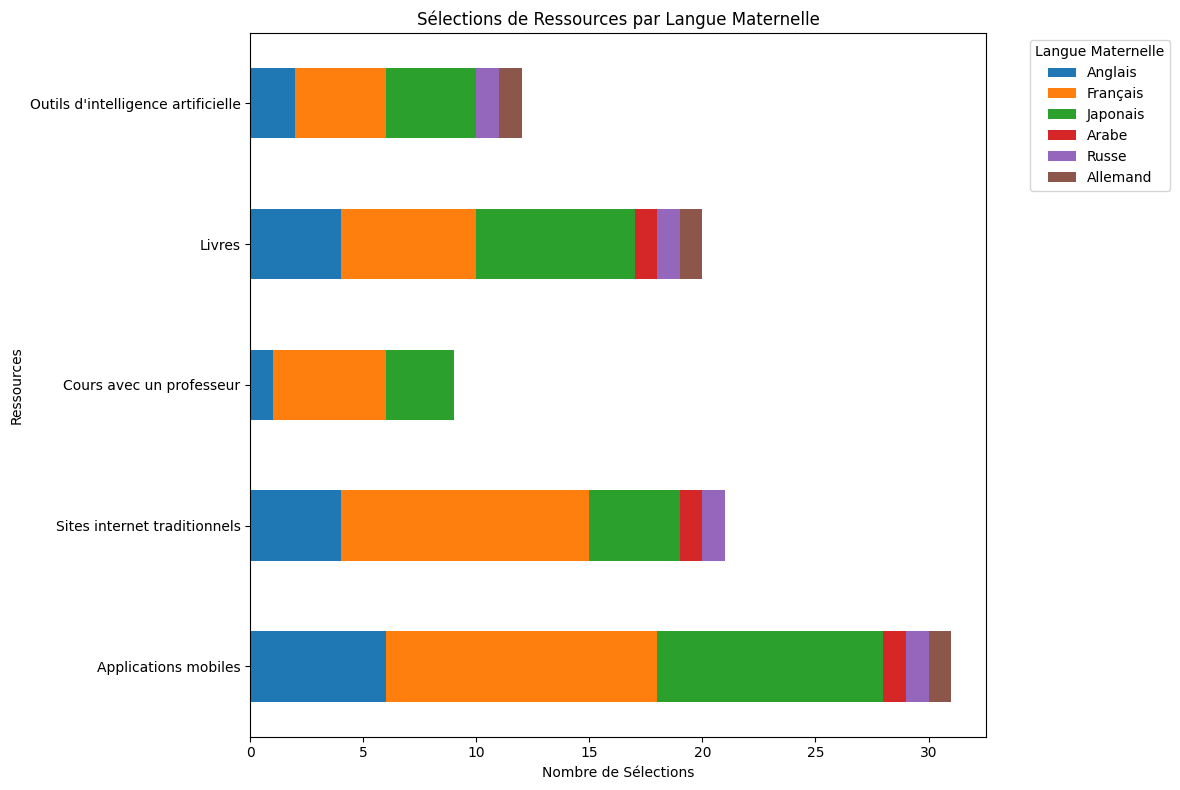

In [109]:
data['Langue Maternelle Normalisée'] = data['Quelle est votre langue maternelle ?'].apply(normalize_language)

resources_by_language = data[['Langue Maternelle Normalisée', 'Quelles sont les ressources que vous utilisez ?']].dropna()

resource_counts_by_language = {}

for _, row in resources_by_language.iterrows():
    langue = row['Langue Maternelle Normalisée']
    resources = row['Quelles sont les ressources que vous utilisez ?'].split('\n')
    for resource in resources:
        if resource not in resource_counts_by_language:
            resource_counts_by_language[resource] = Counter()
        resource_counts_by_language[resource][langue] += 1

df = pd.DataFrame(resource_counts_by_language).T.fillna(0)

df_filtered = df[df.sum(axis=1) > 1]

df_filtered.plot(kind='barh', stacked=True, figsize=(12, 8))

plt.xlabel('Nombre de Sélections')
plt.ylabel('Ressources')
plt.title('Sélections de Ressources par Langue Maternelle')
plt.legend(title="Langue Maternelle", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


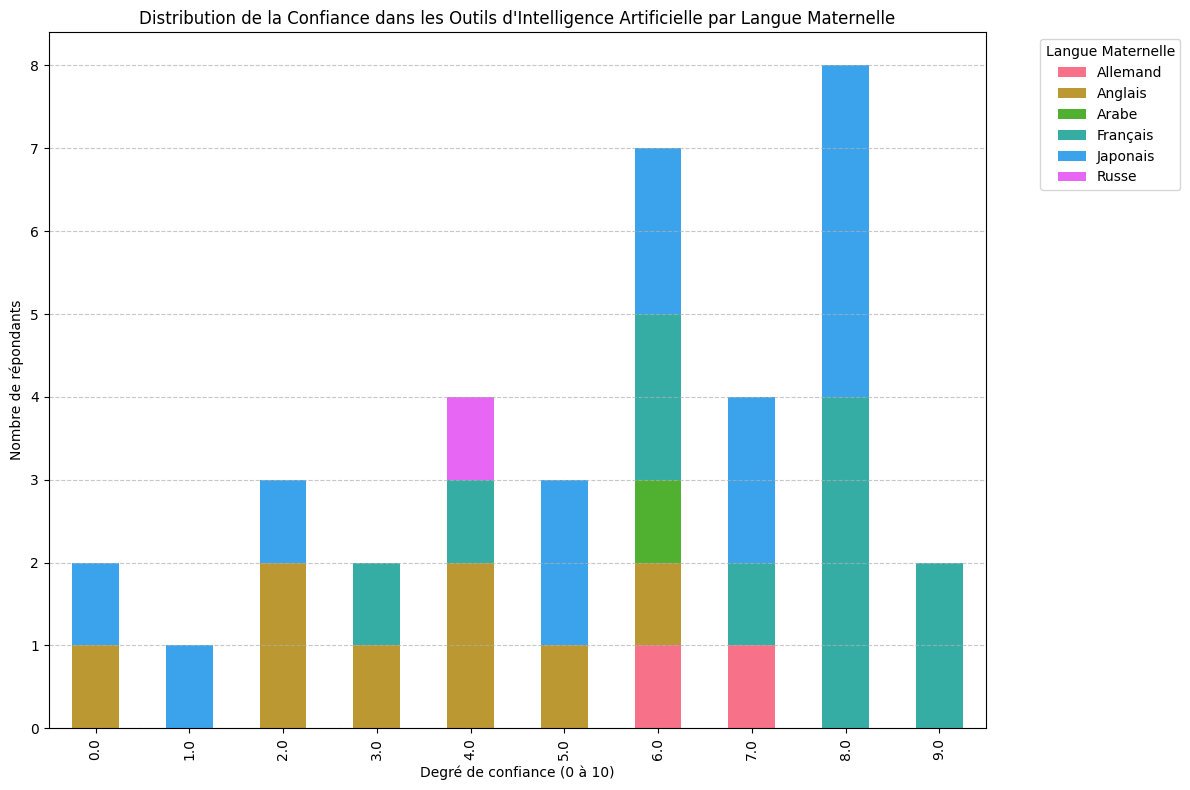

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Langue Maternelle Normalisée'] = data['Quelle est votre langue maternelle ?'].apply(normalize_language)

confiance_ia_by_language = data[['Langue Maternelle Normalisée', "Dans quelle mesure faites vous confiance aux outils d'intelligence artificielles ?"]].dropna()

pivot_data = confiance_ia_by_language.pivot_table(index="Dans quelle mesure faites vous confiance aux outils d'intelligence artificielles ?", columns='Langue Maternelle Normalisée', aggfunc='size', fill_value=0)

palette = sns.color_palette("husl", len(pivot_data.columns))

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=palette)
plt.xlabel('Degré de confiance (0 à 10)')
plt.ylabel('Nombre de répondants')
plt.title('Distribution de la Confiance dans les Outils d\'Intelligence Artificielle par Langue Maternelle')
plt.legend(title="Langue Maternelle", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
